<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/T2.9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

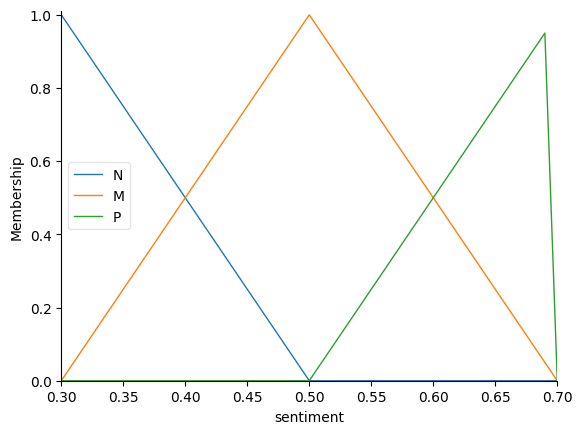

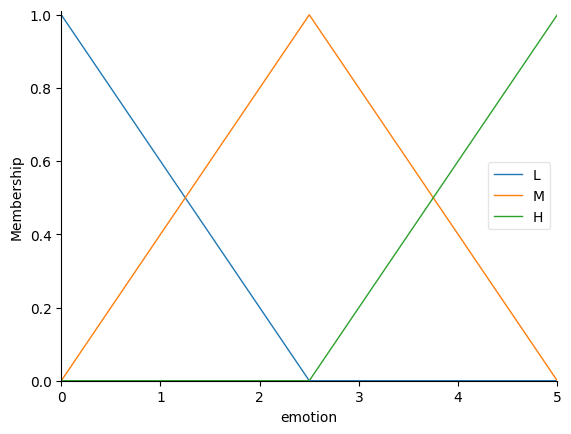

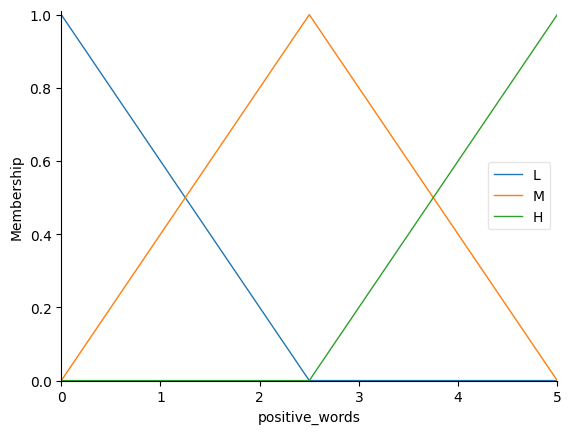

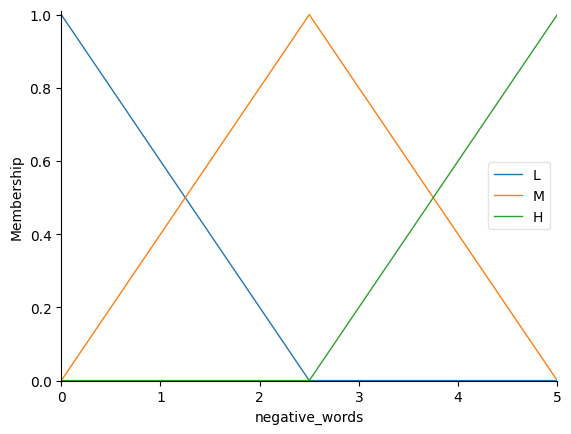

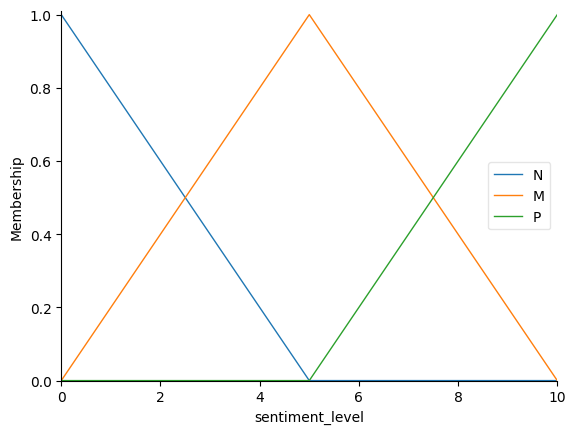

In [21]:
#2.9 Phan hoi KH
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
sentiment=ctrl.Antecedent(np.arange(0.3,0.71,0.01),'sentiment')
emotion=ctrl.Antecedent(np.arange(0,5.1,0.1),'emotion')
positive_words=ctrl.Antecedent(np.arange(0,5.1,0.1),'positive_words')
negative_words=ctrl.Antecedent(np.arange(0,5.1,0.1),'negative_words')
sentiment_level=ctrl.Consequent(np.arange(0,10.1,0.1),'sentiment_level')
sentiment['N']=fuzz.trimf(sentiment.universe,[0.3,0.3,0.5])
sentiment['M']=fuzz.trimf(sentiment.universe,[0.3,0.5,0.7])
sentiment['P']=fuzz.trimf(sentiment.universe,[0.5,0.7,0.7])
emotion['L']=fuzz.trimf(emotion.universe,[0,0,2.5])
emotion['M']=fuzz.trimf(emotion.universe,[0,2.5,5])
emotion['H']=fuzz.trimf(emotion.universe,[2.5,5,5])
positive_words['L']=fuzz.trimf(positive_words.universe,[0,0,2.5])
positive_words['M']=fuzz.trimf(positive_words.universe,[0,2.5,5])
positive_words['H']=fuzz.trimf(positive_words.universe,[2.5,5,5])
negative_words['L']=fuzz.trimf(negative_words.universe,[0,0,2.5])
negative_words['M']=fuzz.trimf(negative_words.universe,[0,2.5,5])
negative_words['H']=fuzz.trimf(negative_words.universe,[2.5,5,5])
sentiment_level['N']=fuzz.trimf(sentiment_level.universe,[0,0,5])
sentiment_level['M']=fuzz.trimf(sentiment_level.universe,[0,5,10])
sentiment_level['P']=fuzz.trimf(sentiment_level.universe,[5,10,10])
sentiment.view()
emotion.view()
positive_words.view()
negative_words.view()
sentiment_level.view()

Sentiment Level: 4.166666666666668


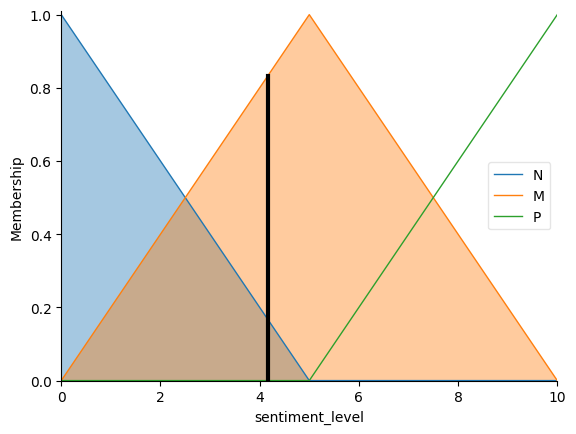

In [22]:
rule1=ctrl.Rule(sentiment['N']|emotion['H'],sentiment_level['N'])
rule2=ctrl.Rule(sentiment['N']|emotion['L'],sentiment_level['M'])
rule3=ctrl.Rule(sentiment['M']|emotion['M'],sentiment_level['M'])
rule4=ctrl.Rule(sentiment['P']|emotion['H'],sentiment_level['P'])
rule5=ctrl.Rule(positive_words['H']|negative_words['L'],sentiment_level['P'])
rule6=ctrl.Rule(positive_words['L']|negative_words['H'],sentiment_level['M'])
rule7=ctrl.Rule(positive_words['M']|negative_words['M'],sentiment_level['M'])
rule8=ctrl.Rule(sentiment['N']|negative_words['H']|emotion['H'],sentiment_level['N'])
rule9=ctrl.Rule(sentiment['M']|positive_words['M']|emotion['M'],sentiment_level['M'])
rule10=ctrl.Rule(sentiment['P']|positive_words['H']|emotion['H'],sentiment_level['P'])
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10])
control_sim=ctrl.ControlSystemSimulation(control_system)
control_sim.input['sentiment']=5
control_sim.input['emotion']=2
control_sim.input['positive_words']=2
control_sim.input['negative_words']=5
control_sim.compute()
print(f"Sentiment Level: {control_sim.output['sentiment_level']}")
sentiment_level.view(sim=control_sim)